## Exploratory Data Analysis (EDA)

### Sales Analyst

### Tổng quan thị trường sách Tiki

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
book = pd.read_csv('../data/book_data_cleaned_forPowerBI.csv')

In [4]:
book.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount,revenue
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.10,2.46,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4,130564.50
1,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.27,2.28,7929,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3,18078.12
2,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,7.98,4.79,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4,85721.84
3,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.00,1.80,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4,44402.40
4,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.13,3.08,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4,30800.00


In [5]:
print(f"Tổng số đầu sách: {book['product_id'].nunique()}")
print(f"Tổng số tác giả: {book['authors'].nunique()}")
print(f"Tổng số NXB: {book['manufacturer'].nunique()}")
print(f"Tổng số lượng sách bán ra: {book['quantity'].sum():,.0f}")
print(f"Tổng doanh thu: ${book['revenue'].sum():,.2f} (USD)")
print(f"Doanh thu trung bình trên mỗi đầu sách: ${book['revenue'].mean():,.2f} (USD)")

Tổng số đầu sách: 1776
Tổng số tác giả: 1082
Tổng số NXB: 42
Tổng số lượng sách bán ra: 4,844,002
Tổng doanh thu: $19,912,205.43 (USD)
Doanh thu trung bình trên mỗi đầu sách: $11,211.83 (USD)


### Top 10 cuốn sách bán chạy nhất 

In [6]:
top_10_books_sales_well = book.nlargest(10, 'quantity')[['title','quantity', 'authors', 'current_price', 'category']].reset_index(drop=True)
top_10_books_sales_well['quantity'] = top_10_books_sales_well['quantity'].map('{:,.0f}'.format)
print("TOP 10 SÁCH BÁN CHẠY NHẤT:")
display(top_10_books_sales_well)

TOP 10 SÁCH BÁN CHẠY NHẤT:


,title,quantity,authors,current_price,category
0,OSHO - Yêu - Being In Love,"671,121",Osho,4.21,Sách nghệ thuật sống đẹp
1,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh","65,623",Tống Mặc,2.17,Sách tư duy - Kỹ năng sống
2,Khi Hơi Thở Hóa Thinh Không,"59,734",Paul Kalanithi,2.61,Tiểu sử - Hồi ký
3,Cây Cam Ngọt Của Tôi,"53,075",José Mauro de Vasconcelos,2.46,Tiểu Thuyết
4,Đàn Ông Sao Hỏa Đàn Bà Sao Kim,"48,419",John Gray,5.14,Sách tư duy - Kỹ năng sống
5,Dám Bị Ghét,"45,858",Koga Fumitake,2.19,Tiểu Thuyết
6,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),"45,110",Nguyên Phong,4.21,Muôn Kiếp Nhân Sinh (Many Lives - Many Times)
7,Bước Chậm Lại Giữa Thế Gian Vội Vã (Tái Bản),"44,869",Hae Min,1.94,Truyện ngắn - Tản văn - Tạp Văn
8,Đời Ngắn Đừng Ngủ Dài (Tái Bản),"44,164",Robin Sharma,2.11,Sách tư duy - Kỹ năng sống
9,Chờ Đến Mẫu Giáo Thì Đã Muộn,"36,933",Ibuka Masaru,2.09,Sách Làm Cha Mẹ


Những cuốn sách về kỹ năng sống, self-help chiếm đa số trong top 10 sách bán chạy nhất cho thấy đây là các cuốn sách được ưa chuộn nhất

### Top 10 cuốn sách có doanh thu cao nhất

In [7]:
top_10_book_revenue = book.nlargest(10, 'revenue')[['title','revenue','quantity', 'authors', 'current_price', 'category']].reset_index(drop=True)
top_10_book_revenue['revenue'] = top_10_book_revenue['revenue'].map('{:,.2f}'.format)
print("TOP 10 SÁCH THEO DOANH THU (REVENUE)")
display(top_10_book_revenue)

TOP 10 SÁCH THEO DOANH THU (REVENUE)


,title,revenue,quantity,authors,current_price,category
0,OSHO - Yêu - Being In Love,"2,825,419.41",671121,Osho,4.21,Sách nghệ thuật sống đẹp
1,Boxset Harry Potter - Tiếng Việt (Trọn Bộ 7 Tập),"436,027.20",9562,J. K. Rowling,45.60,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu
2,Bộ sách Làm Giàu Từ Chứng Khoán (How To Make M...,"389,849.60",14656,William J. O’Neil,26.60,"Sách tài chính, tiền tệ"
3,Payback Time - Ngày Đòi Nợ,"354,818.24",31234,Phil Town,11.36,Bài học kinh doanh
4,Đàn Ông Sao Hỏa Đàn Bà Sao Kim,"248,873.66",48419,John Gray,5.14,Sách tư duy - Kỹ năng sống
5,Luật Tâm Thức - Giải Mã Ma Trận Vũ Trụ,"234,381.84",27672,Ngô Sa Thạch,8.47,Lĩnh vực khác
6,Tuyệt kỹ Giao dịch bằng đồ thị nến Nhật – Japa...,"231,217.20",12195,Steve Nison,18.96,"Sách tài chính, tiền tệ"
7,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),"189,913.10",45110,Nguyên Phong,4.21,Muôn Kiếp Nhân Sinh (Many Lives - Many Times)
8,Cuốn Sách Hoàn Hảo Về Ngôn Ngữ Cơ Thể - Body L...,"184,159.60",30490,Allan & Barbara Pease,6.04,Sách tư duy - Kỹ năng sống
9,Thiết Kế Cuộc Đời Thịnh Vượng - Design a Prosp...,"176,886.56",15571,Thái Phạm,11.36,Sách tư duy - Kỹ năng sống



- Cuốn “OSHO – Yêu: Being In Love” có doanh thu cao nhất (≈ 2.82 triệu USD), mặc dù giá bán chỉ có (4.21 USD), cuốn sách này xuất hiện ở cả 2 top bán chạy và doanh thu cao nhất có vẻ cuốn sách này khá hay
- Bộ sách "Boxset Harry Potter - Tiếng Việt (Trọn Bộ 7 Tập)" có doanh thu cao thứ hai là (≈ 436,027.20 nghìn USD), giá bán là (45.60 USD), nhưng chia ra cho 7 cuốn thì chỉ có tầm (6,51 USD) một cuốn
- Các cuốn sách về tài chính, tiền tệ, kinh doanh có giá trung bình khá cao, là những phân khúc sách cao cấp


### Top 10 thể loại sách có danh thu cao nhất 

TOP 10 THỂ LOẠI SÁCH CÓ DOANH THU CAO NHẤT:


,category,revenue
0,Sách tư duy - Kỹ năng sống,"$3,599,021.21"
1,Sách nghệ thuật sống đẹp,"$3,179,522.23"
2,"Sách tài chính, tiền tệ","$1,563,891.36"
3,Bài học kinh doanh,"$1,120,258.02"
4,Tiểu Thuyết,"$1,099,431.28"
5,Truyện ngắn - Tản văn - Tạp Văn,"$1,000,352.24"
6,Sách kỹ năng làm việc,"$718,457.40"
7,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu,"$628,107.97"
8,Sách Học Tiếng Anh,"$557,912.65"
9,Truyện dài,"$508,914.40"


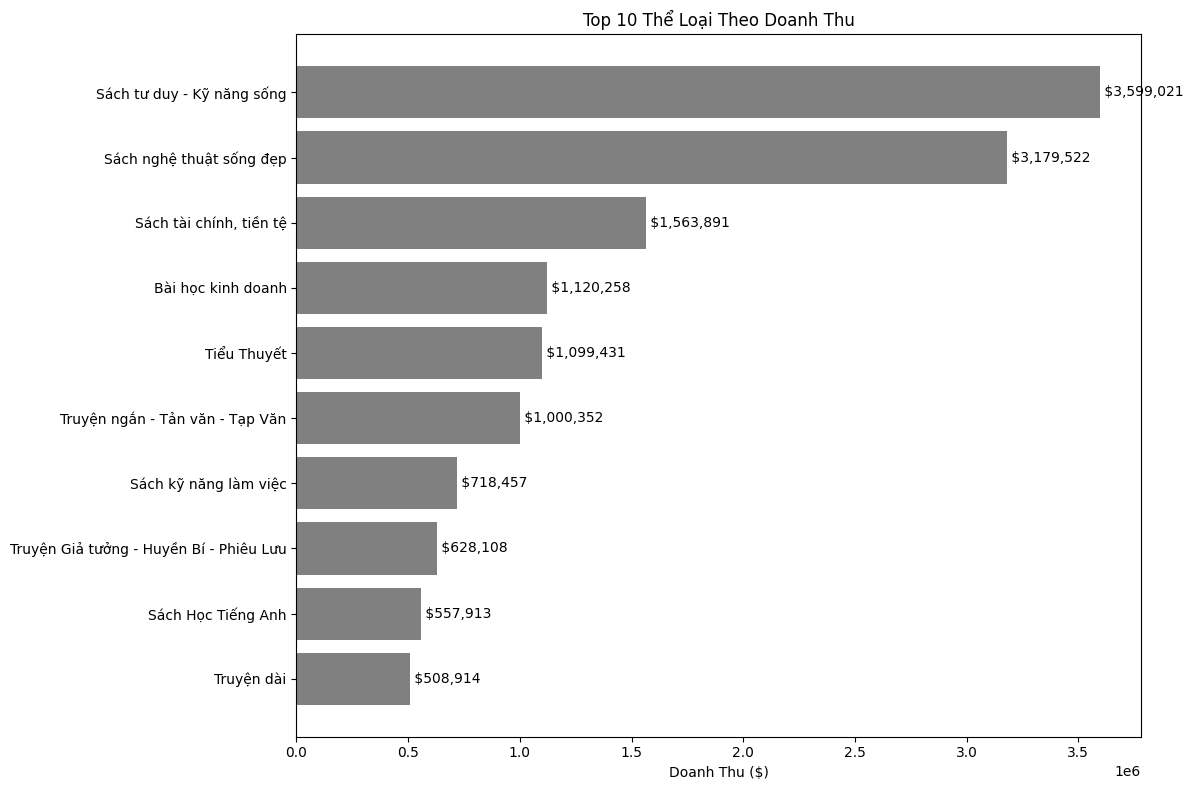

In [17]:
top_10_category_revenue = book.groupby('category')['revenue'].sum().reset_index()
top_10_category_revenue = top_10_category_revenue.sort_values('revenue', ascending=False).head(10)
top_10_category_revenue = top_10_category_revenue.reset_index(drop=True)  
top_10_category_revenue['revenue'] = top_10_category_revenue['revenue'].map('${:,.2f}'.format)

print("TOP 10 THỂ LOẠI SÁCH CÓ DOANH THU CAO NHẤT:")
display(top_10_category_revenue)

chart_data = book.groupby('category')['revenue'].sum().reset_index()
chart_data = chart_data.sort_values('revenue', ascending=False).head(10)


## visualization
plt.figure(figsize=(12, 8))
plt.barh(chart_data['category'], chart_data['revenue'], color='gray')

# Thêm số
for i, v in enumerate(chart_data['revenue']):
    plt.text(v, i, f' ${v:,.0f}', va='center')

plt.xlabel('Doanh Thu ($)')
plt.title('Top 10 Thể Loại Theo Doanh Thu')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 1 và 2 bỏ xa các thể loại còn lại nên ở insight này ta sẽ phân tích về 2 thể loại trên
- Sách tư duy - Kỹ năng sống = $3,599,021.21, thể loại này không có cuốn nào nằm trong top 10 sách theo doanh thu nhưng lại dẫn đầu về tổng thể loại cho thấy độ ổn định và bán chạy liên tục
- Sách nghệ thuật sống đẹp = $3,179,522.23, rất cao nhưng doanh thu của sách OSHO - Yêu - Being In Love	= $2,825,419.41  ≈ **88.9%** nếu cuốn này giảm thiệt khả năng cao thể loại này sẽ rớt hạng

=>> Đầu tư vào loại Sách tư duy - Kỹ năng sống vì tính ổn định trong doanh thu

### Phân bố giá sách

In [11]:
price_ranges = pd.cut(book['current_price'], 
                      bins=[0, 5, 10, 20, 50, 100],
                      labels=['$0-5', '$5-10', '$10-20', '$20-50', '>$50'])

price_dist = book.groupby(price_ranges).agg({
    'product_id': 'count',
    'quantity': 'sum',
    'revenue': 'sum'
}).rename(columns={'product_id': 'Số sách', 'quantity': 'Tổng số lượng', 'revenue': 'Tổng doanh thu'})

price_dist['Tổng doanh thu'] = price_dist['Tổng doanh thu'].map('${:,.2f}'.format)
price_dist['Tổng số lượng'] = price_dist['Tổng số lượng'].astype(int).map('{:,}'.format)

print("PHÂN BỐ GIÁ SÁCH:")
display(price_dist)

PHÂN BỐ GIÁ SÁCH:


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27820\1531198710.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_dist = book.groupby(price_ranges).agg({


,Số sách,Tổng số lượng,Tổng doanh thu
current_price,,,
$0-5,1302,"3,912,519","$11,906,797.90"
$5-10,361,"728,288","$4,785,488.35"
$10-20,93,"172,582","$2,232,756.90"
$20-50,19,"30,557","$987,162.28"
>$50,0,0,$0.00


1. Sách tập trung ở mức giá nào?
- Nhìn vào cột “Số sách”, ta thấy 1.302 đầu sách nằm trong khoảng giá 0–5 USD, chiếm đa số tuyệt đối.
➡️ Phần lớn sách trên Tiki tập trung ở phân khúc giá rẻ, dưới 5 USD.
2. Sách giá rẻ hay giá cao bán nhiều hơn?
- $0–5 có 3,912,519 lượt bán, cao vượt trội so với các mức khác.
- $20–50 chỉ có 30,557 lượt bán.
- ➡️ Sách giá rẻ bán được nhiều hơn rất nhiều so với sách giá cao.
3. Mục giá nào vừa bán chạy vừa có doanh thu tốt?
- ➡️ Phân khúc $0–5 USD là vừa bán chạy nhất, vừa mang lại doanh thu cao nhất, tức là mức giá vừa phải – dễ tiếp cận – có sức mua lớn.

=>> Thị trường Tiki hiện tập trung chủ yếu ở sách giá rẻ dưới 5 USD, nhóm này vừa có nhiều đầu sách, bán chạy nhất và cũng tạo ra doanh thu lớn nhất. 

Các phân khúc giá cao tuy có giá trị mỗi đơn lớn hơn nhưng không cạnh tranh được về số lượng bán.

### Top 10 tác giả theo doanh thu


In [12]:
top_10_authors_revenue = book.groupby('authors')['revenue'].sum().reset_index()
top_10_authors_revenue = top_10_authors_revenue.sort_values('revenue', ascending=False).head(10)
top_10_authors_revenue = top_10_authors_revenue.reset_index(drop=True)
top_10_authors_revenue['revenue'] = top_10_authors_revenue['revenue'].map('${:,.2f}'.format)

authors_unknown_revenue = book[book['authors'] == 'Unknown']['revenue'].sum()
total_revenue = book['revenue'].sum()
unknown_percent = (authors_unknown_revenue / total_revenue) * 100

print("TOP 10 TÁC GIẢ CÓ DOANH THU CAO NHẤT:")
display(top_10_authors_revenue)

print(f" ⚠️Tác giả Unknown chiếm {unknown_percent:.2f}% tổng doanh thu.")

TOP 10 TÁC GIẢ CÓ DOANH THU CAO NHẤT:


,authors,revenue
0,Osho,"$2,868,416.06"
1,Unknown,"$955,195.00"
2,Nguyên Phong,"$521,756.92"
3,J. K. Rowling,"$474,161.92"
4,Nguyễn Nhật Ánh,"$422,117.02"
5,William J. O’Neil,"$389,849.60"
6,Phil Town,"$354,818.24"
7,Higashino Keigo,"$267,710.05"
8,John Gray,"$262,794.78"
9,Ngô Sa Thạch,"$234,381.84"


 ⚠️Tác giả Unknown chiếm 4.80% tổng doanh thu.


*Note* 
- Giá trị “Unknown” có thể xuất phát từ các đầu sách biên dịch, sách tập thể hoặc do thiếu thông tin (data quality issues).
- Nhóm này vẫn được giữ lại trong phân tích nhằm đảm bảo tính minh bạch và phản ánh chính xác dữ liệu thực tế.


### Top 10 nhà xuất bản theo doanh thu

In [13]:
top_10_manufacturers_revenue = book.groupby('manufacturer')['revenue'].sum().reset_index()
top_10_manufacturers_revenue = top_10_manufacturers_revenue.sort_values('revenue', ascending=False).head(10)
top_10_manufacturers_revenue = top_10_manufacturers_revenue.reset_index(drop=True)
top_10_manufacturers_revenue['revenue'] = top_10_manufacturers_revenue['revenue'].map('${:,.2f}'.format)


print("TOP 10 NHÀ XUẤT BẢN CÓ DOANH THU CAO NHẤT:")
display(top_10_manufacturers_revenue) 

manufacturers_unknown_revenue = book[book['manufacturer'] == 'Unknown']['revenue'].sum()
total_revenue = book['revenue'].sum()
unknown_percent = (manufacturers_unknown_revenue / total_revenue) * 100

print(f" ⚠️Nhà xuất bản Unknown chiếm {unknown_percent:.2f}% tổng doanh thu.")


TOP 10 NHÀ XUẤT BẢN CÓ DOANH THU CAO NHẤT:


,manufacturer,revenue
0,Unknown,"$5,720,159.15"
1,Nhà Xuất Bản Thế Giới,"$4,057,408.37"
2,Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM,"$2,836,619.75"
3,Nhà Xuất Bản Tổng hợp TP.HCM,"$1,214,777.86"
4,Nhà Xuất Bản Dân Trí,"$865,549.56"
5,Nhà Xuất Bản Hội Nhà Văn,"$706,457.98"
6,Nhà Xuất Bản Thanh Niên,"$660,527.85"
7,NXB Trẻ,"$518,904.19"
8,Nhà Xuất Bản Lao Động,"$512,456.86"
9,Nhà Xuất Bản Hà Nội,"$458,095.63"


 ⚠️Nhà xuất bản Unknown chiếm 28.73% tổng doanh thu.


*Note*
- Giá trị “Unknown” có thể đến từ các đầu sách chưa ghi rõ thông tin nhà xuất bản trong dữ liệu hoặc do lỗi nhập liệu (data quality issues).
- Tuy nhiên, nhóm này chiếm 28.73% tổng doanh thu nên được sẽ giữ lại trong phân tích để đảm bảo tính minh bạch và phản ánh đúng thực tế của dữ liệu.